*****WOMEN CLOTHING IMAGE TAG*****

![](https://www.ximilar.com/wp-content/uploads/2018/09/FashionTaggingIntro-min@2x.jpg)

In [1]:
import os
data_directory='../input/apparel-images-dataset'
print(os.listdir(data_directory))
print(len(data_directory))


['white_pants', 'black_pants', 'white_shoes', 'brown_shoes', 'blue_shirt', 'green_shoes', 'blue_pants', 'white_shorts', 'red_pants', 'blue_shoes', 'black_dress', 'green_pants', 'black_shorts', 'brown_shorts', 'red_shoes', 'blue_dress', 'black_shirt', 'red_dress', 'green_shirt', 'white_dress', 'green_shorts', 'blue_shorts', 'brown_pants', 'black_shoes']
31


**Importing Libraries**

![](https://miro.medium.com/max/691/0*xXUYOs5MWWenxoNz)

In [2]:
import torch
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, random_split, DataLoader
from PIL import Image
import torchvision.models as models
from tqdm.notebook import tqdm
import torchvision.transforms as T
import torch.nn.functional as F
import torch.nn as nn
from torchvision.utils import make_grid

import os
import re
import requests

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**#Making a list that contains the paths of each image**

In [3]:

def get_path_names(dir):
  images = []
  for path, subdirs, files in os.walk(data_directory):  
    for name in files:
      #print(os.path.join(path, name)) 
      images.append(os.path.join(path, name))
  return images

In [4]:
path=get_path_names(data_directory)

In [5]:
path[:3]

['../input/apparel-images-dataset/white_pants/a5a0212b112bffe3129769299aa2aa07893e9b59.jpg',
 '../input/apparel-images-dataset/white_pants/9a6847d1ddbb367df02536f00a65be6e85547f1d.jpg',
 '../input/apparel-images-dataset/white_pants/1b27a45d30e36736e5a85add10a4d2d2f5dbf274.jpg']

In [6]:
classes = ['black', 'blue', 'brown', 'green', 'white', 'red', 'dress', 'pants', 'shorts', 'shoes', 'shirt']
len(classes)

11

***#encoding the classes into a tensor of shape (11) with 0 and 1s.***

**We want to encode our images with lables like Brand,Type of dress,colors etc**

In [7]:
def encode_label(label, classes_list = classes): 
    target = torch.zeros(11)
    for l in label:
      idx = classes_list.index(l)
      target[idx] = 1
    return target


def decode_target(target, threshold=0.5): #decoding the prediction tensors of 0s and 1s into text form
    result = []
    for i, x in enumerate(target):
        if (x >= threshold):
          result.append(classes[i])     
    return ' '.join(result)

![](https://discuss.pytorch.org/uploads/default/original/2X/1/115b65e153fb5081aee92ba03896d96a8227c61e.png)

In [8]:
# A class to create a Custom Dataset that will load images and encode the labels of those images from their folder names
class myDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.transform = transform
        self.root_dir = root_dir
        self.images = get_path_names(root_dir)              
      

    def __len__(self):
        return len(self.images)       

    def __getitem__(self, idx):
        img_path = self.images[idx]
        img = Image.open(img_path)
       
        if self.transform:
            img = self.transform(img)    
            
        label = re.findall(r'\w+\_\w+', img_path)[0].split('_') 
        
        return img, encode_label(label)   

**Example of Transformed image**

![](https://miro.medium.com/max/1328/1*DtEo9TUgJ95YDqrsnPOW0g.png)

In [9]:
imagenet_stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # mean and std values of the Imagenet Dataset so that pretrained models could also be used


#setting a set of transformations to transform the images 
transform= T.Compose([T.Resize(128),
                      T.RandomCrop(128),
                      T.RandomHorizontalFlip(),
                      T.RandomRotation(2),
                      T.ToTensor(),
                      T.Normalize(*imagenet_stats)])

In [10]:
#Creating a dataset that loads images from the specified directory, encode their labels and transforming them into tensors.
dataset = myDataset(data_directory, transform = transform)
len(dataset)

11385

In [11]:
#Creating a dataset that loads images from the specified directory, encode their labels and transforming them into tensors.
dataset = myDataset(data_directory, transform = transform)
len(dataset)

11385

In [12]:
dataset[5]

(tensor([[[-2.1179, -2.1179, -0.3369,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -0.3369,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -0.3198,  ..., -0.6623, -0.6623, -0.6623],
          ...,
          [ 0.6392,  0.6392,  0.6392,  ..., -0.7650, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -0.6965, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -0.5424, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -0.2150,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -0.2150,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -0.1975,  ..., -0.5476, -0.5476, -0.5476],
          ...,
          [ 0.7829,  0.7829,  0.7829,  ..., -0.6527, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -0.5826, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -0.4251, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044,  0.0082,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044,

Label: white pants

tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.])


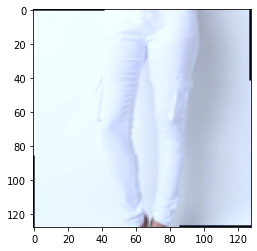

In [13]:
def denormalize(img_tensors): #this function will denormalize the tensors 
    return img_tensors * imagenet_stats[1][0] + imagenet_stats[0][0]

def show_examples(img,label):
  plt.imshow(denormalize(img).permute(1,2,0))
  print("Label:", decode_target(label))
  print()
  print(label)

show_examples(*dataset[113]) #let's take an example

**Dividing our Dataset in Traing,validation and Test**

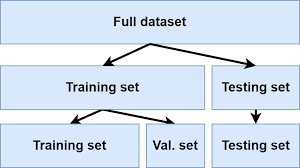

In [14]:
validation_percent = int(0.10 * len(dataset)) #setting 15 percent of the total number of images for validation
train_size = len(dataset) - validation_percent
validation_size = len(dataset) - train_size
train_size, validation_size

(10247, 1138)

In [15]:
train_datasplit, validation_datasplit = random_split(dataset, [train_size, validation_size]) #splitting the dataset for training and validation.
len(train_datasplit), len(validation_datasplit)

(10247, 1138)

In [16]:
#setting batch_size for Dataloader to load the data batch by batch for each epoch
batch_size = 32
train_loader = DataLoader(train_datasplit, batch_size, shuffle=True)
validation_loader = DataLoader(validation_datasplit, batch_size * 2)

In [17]:
for xb, yb in train_loader:
  print(xb.shape)
  print(yb.shape)
  break  

torch.Size([32, 3, 128, 128])
torch.Size([32, 11])


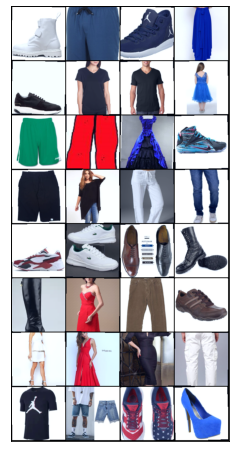

In [18]:
#let's see a batch of images (16 images) in a grid
def show_batch_images(data, nmax=32):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xticks([]); 
        ax.set_yticks([])
        ax.imshow(make_grid(denormalize(images[:nmax]), nrow=4).permute(1, 2, 0))
        break

show_batch_images(train_loader)

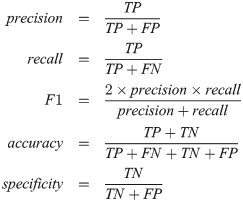

In [19]:
def F_score(output, label, threshold=0.5, beta=1): #Calculate the accuracy of the model
    prob = output > threshold
    label = label > threshold

    TP = (prob & label).sum(1).float()
    TN = ((~prob) & (~label)).sum(1).float()
    FP = (prob & (~label)).sum(1).float()
    FN = ((~prob) & label).sum(1).float()

    precision = torch.mean(TP / (TP + FP + 1e-12))
    recall = torch.mean(TP / (TP + FN + 1e-12))
    F2 = (1 + beta**2) * precision * recall / (beta**2 * precision + recall + 1e-12)
    return F2.mean(0)


class MultilabelImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, targets = batch 
        out = self(images)                            # Generate predictions
        loss = F.binary_cross_entropy(out, targets)   # Calculate loss
        return loss    

    def validation_step(self, batch):
        images, targets = batch 
        out = self(images)                           # Generate predictions
        loss = F.binary_cross_entropy(out, targets)  # Calculate loss
        score = F_score(out, targets)                # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_score': score.detach() }      


    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()       # Combine losses and get the mean value
        batch_scores = [x['val_score'] for x in outputs]    
        epoch_score = torch.stack(batch_scores).mean()      # Combine accuracies and get the mean value
        return {'val_loss': epoch_loss.item(), 'val_score': epoch_score.item()}    

    def epoch_end(self, epoch, result):                     # display the losses
        print("Epoch [{}], last_lr: {:.4f}, train_loss: {:.4f}, val_loss: {:.4f}, val_score: {:.4f}".format(epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_score']))

In [20]:
#helper functions to load the data and model onto GPU
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')  


def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():  
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device       

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

device = get_default_device()
device

device(type='cuda')

In [21]:
#loading training and validation data onto GPU
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(validation_loader, device)

In [22]:
# checking up the shapes of the datas
for xb, yb in train_dl:
  print(xb.shape)
  print(yb.shape)
  break

torch.Size([32, 3, 128, 128])
torch.Size([32, 11])


In [23]:

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history


def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader)) #schedule the learning rate with OneCycleLR

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()

        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

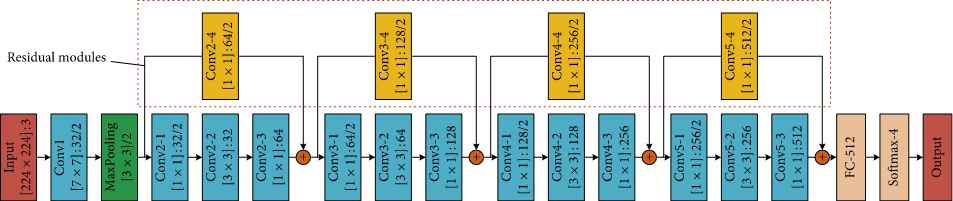

In [24]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]

    if pool: layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)


class ResNet15(MultilabelImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()     
        #input 3 x 128 x 128
        self.conv1 = conv_block(in_channels, 64)  #output 64 x 128 x 128
        self.res1 = nn.Sequential(conv_block(64, 64), conv_block(64, 64)) #output 64 x 128 x 128


        self.conv2 = conv_block(64, 128, pool=True) #output 128 x 32 x 32
        self.res2 = nn.Sequential(conv_block(128, 128), conv_block(128, 128), conv_block(128, 128))  #output 128 x 32 x 32  


        self.conv3 = conv_block(128, 512, pool=True) #output 512 x 8 x 8
        self.res3 = nn.Sequential(conv_block(512, 512), conv_block(512, 512)) #output 512 x 8 x 8


        self.conv4 = conv_block(512, 1024, pool=True) #output 1024 x 2 x 2
        self.res4 = nn.Sequential(conv_block(1024, 1024), conv_block(1024, 1024)) #output 1024 x 2 x 2


        self.classifier = nn.Sequential(nn.MaxPool2d(2), #output 1024 x 1 x 1
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(1024 * 1 * 1, 512), #output 512
                                        nn.ReLU(),
                                        nn.Linear(512, num_classes)) #output 11  
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.res1(out) + out
        out = self.conv2(out)
        out = self.res2(out) + out
        out = self.conv3(out)
        out = self.res3(out) + out
        out = self.conv4(out)
        out = self.res4(out) + out
        out = self.classifier(out)
        out = F.sigmoid(out)
        return out

In [25]:
model = to_device(ResNet15(3, len(classes)), device) #input size: 3, output size: 11, loading model onto GPU
model

ResNet15(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=Fa

In [26]:
#checking the shape of outputs that the model will produce before starting the training process
for images, labels in train_dl:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([32, 3, 128, 128])
outputs.shape :  torch.Size([32, 11])
Sample outputs :
 tensor([[0.5887, 0.1614, 0.4707, 0.8262, 0.0801, 0.1623, 0.3392, 0.5148, 0.1585,
         0.4901, 0.4716],
        [0.5948, 0.2787, 0.5419, 0.6803, 0.1890, 0.3232, 0.5665, 0.5160, 0.2344,
         0.5043, 0.4628]], device='cuda:0')


In [27]:
history = [evaluate(model, val_dl)]
history

[{'val_loss': 0.6841366291046143, 'val_score': 0.23648633062839508}]

In [28]:
epochs = 3
max_lr = 0.001
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [29]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, val_dl,
                         grad_clip=grad_clip, 
                         weight_decay=weight_decay, 
                         opt_func=opt_func)

  0%|          | 0/321 [00:00<?, ?it/s]

Epoch [0], last_lr: 0.0010, train_loss: 0.1923, val_loss: 0.1560, val_score: 0.8097


  0%|          | 0/321 [00:00<?, ?it/s]

Epoch [1], last_lr: 0.0005, train_loss: 0.1031, val_loss: 0.0676, val_score: 0.9301


  0%|          | 0/321 [00:00<?, ?it/s]

Epoch [2], last_lr: 0.0000, train_loss: 0.0614, val_loss: 0.0390, val_score: 0.9607
CPU times: user 4min 8s, sys: 4.71 s, total: 4min 13s
Wall time: 5min 30s


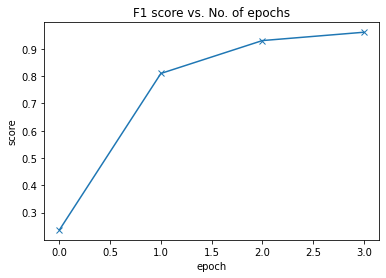

In [30]:
def plot_scores(history):
    scores = [x['val_score'] for x in history]
    plt.plot(scores, '-x')
    plt.xlabel('epoch')
    plt.ylabel('score')
    plt.title('F1 score vs. No. of epochs');
plot_scores(history)

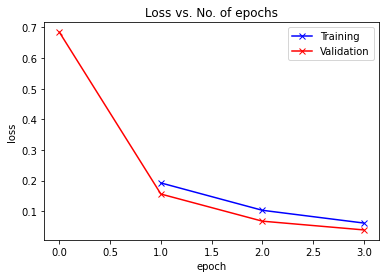

In [31]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');
    
plot_losses(history)

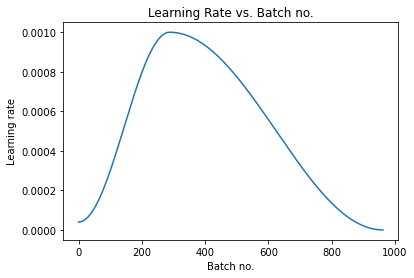

In [32]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');
plot_lrs(history)

Label: black shoes

tensor([9.4829e-01, 1.0998e-02, 3.4921e-03, 5.5230e-04, 1.4707e-02, 1.2760e-03,
        2.1285e-04, 3.6278e-04, 5.2300e-04, 9.9946e-01, 3.3280e-04],
       device='cuda:0', grad_fn=<SelectBackward>)


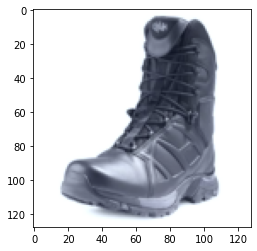

In [33]:
def predict_single(image):
    xb = image.unsqueeze(0)
    xb = to_device(xb, device)
    preds = model(xb)
    prediction = preds[0]
    show_examples(image, prediction)
predict_single(validation_datasplit[84][0]) #checking out the predictions of some images from the validation dataset.

Label: white dress

tensor([6.6284e-05, 1.3081e-04, 2.1210e-05, 1.7104e-06, 9.9915e-01, 5.2306e-04,
        9.9972e-01, 3.8524e-04, 3.9657e-04, 6.7356e-05, 4.3898e-05],
       device='cuda:0', grad_fn=<SelectBackward>)


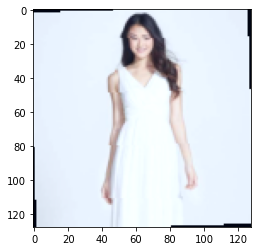

In [34]:
predict_single(validation_datasplit[144][0])

Prediction:

Label: black dress
Prediction:

Label: black shirt
Prediction:

Label: black pants
Prediction:

Label: blue pants
Prediction:

Label: black shirt
Prediction:

Label: blue shirt
Prediction:

Label: black shorts
Prediction:

Label: blue shorts


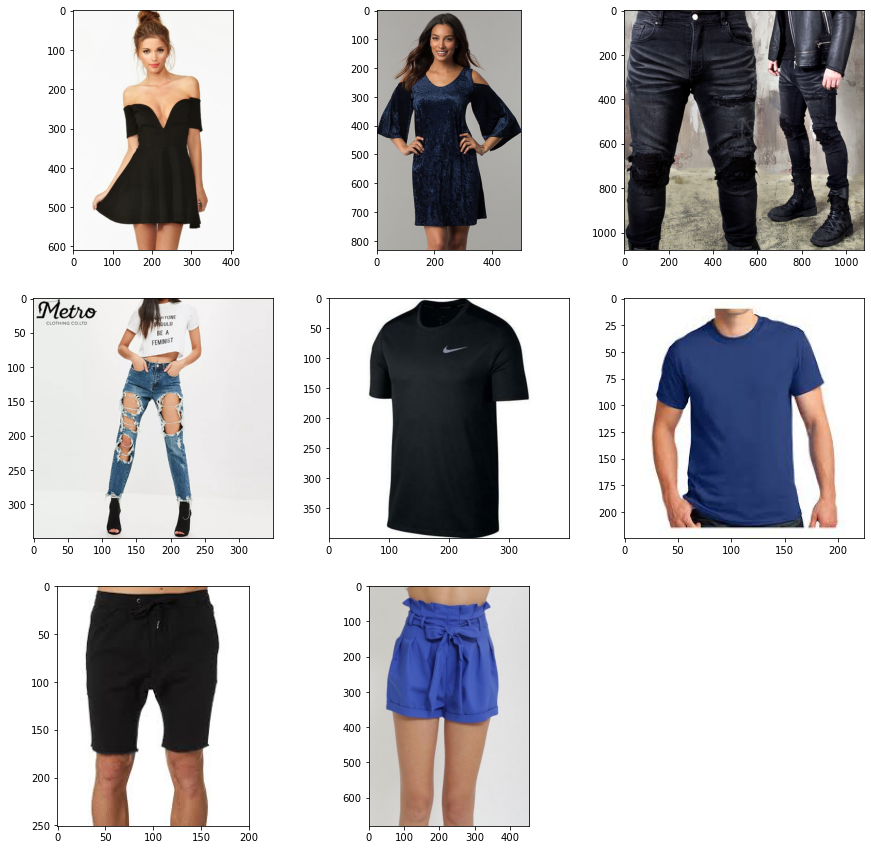

In [35]:
# URLs to images
urls = [
    'http://picture-cdn.wheretoget.it/e07ql5-l-610x610-dress-little+black+dress-skater+dress-nastygal-deep+vneck-short-formal-short+formal+dress-prom-short+prom+dress-black-lbd-short+black+dress-prom+dress-black+dress-blackdress-short+.jpg',
    'https://img.simplydresses.com/_img/SDPRODUCTS/2103981/500/navy-dress-JU-TI-T0468-a.jpg',
    'https://d2euz5hho4dp59.cloudfront.net/images/detailed/40/main_jean_419.jpg',
    'https://sc02.alicdn.com/kf/HTB1QbZ_dzgy_uJjSZJnq6zuOXXaq/Wholesale-scratch-pants-damaged-denim-women-s.jpg_350x350.jpg',
    'https://i.ebayimg.com/00/s/NjAwWDYwMA==/z/pakAAOSwVtta6SN8/$_1.JPG?set_id=880000500F',
    'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSFA1Q-O44dQWt1lvsnOQyoMcQ3myaxY-GscMHgmPtmyWT14ZJU',
    'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTJYyBOAy35RM7m0JzNGHo_-VTSf6bPMh9hACbhhqxsdoMXHQvD',
    'https://cdn.shopify.com/s/files/1/1359/6121/products/7481209_LF0A0919_1024x1024.jpg?v=1511982241',     
]
fig = plt.figure(figsize = (15, 15))

for i, url in enumerate(urls):
    plt.subplot(f'33{i+1}')
    image_url = requests.get(url, stream = True).raw
    image = Image.open(image_url)
    image_tensor = T.ToTensor()(image).unsqueeze(0)
    image_tensor = T.Resize([128,128])(image_tensor)
    image_tensor = T.Normalize(*imagenet_stats)(image_tensor)
    #print(image_tensor.shape)
    img = to_device(image_tensor, device)
    preds = model(img)
    prediction = preds[0]
    print("Prediction:")
    print()
    print("Label:", decode_target(prediction))
    plt.imshow(image)    

In [36]:
# saving to the kaggle working directory
PATH = './plant-disease-model.pth'  
torch.save(model.state_dict(), PATH)

In [37]:
# saving the entire model to working directory
PATH = './plant-disease-model-complete.pth'
torch.save(model, PATH)